In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime as dt
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
df = pd.read_csv('london_merged_v4.csv')


### Amazing Function to plot labels in in lineplots and barplots

In [3]:
def add_value_labels(ax, typ, spacing=5):
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)   
#https://stackoverflow.com/questions/59143306/add-label-values-to-bar-chart-and-line-chart-in-matplotlib

In [4]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,19:00,493,9.0,6.0,82.0,17.0,Cloudy,4,0.0,1.0,3.0
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,20:00,465,8.5,6.5,84.5,13.0,Cloudy,4,0.0,1.0,3.0
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,21:00,474,8.0,6.0,87.0,12.0,Cloudy,4,0.0,1.0,3.0
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,22:00,587,8.0,6.0,90.0,12.0,Cloudy,4,0.0,1.0,3.0


In [5]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,19:00,493,9.0,6.0,82.0,17.0,Cloudy,4,0.0,1.0,3.0
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,20:00,465,8.5,6.5,84.5,13.0,Cloudy,4,0.0,1.0,3.0
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,21:00,474,8.0,6.0,87.0,12.0,Cloudy,4,0.0,1.0,3.0
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,22:00,587,8.0,6.0,90.0,12.0,Cloudy,4,0.0,1.0,3.0


### Correlation

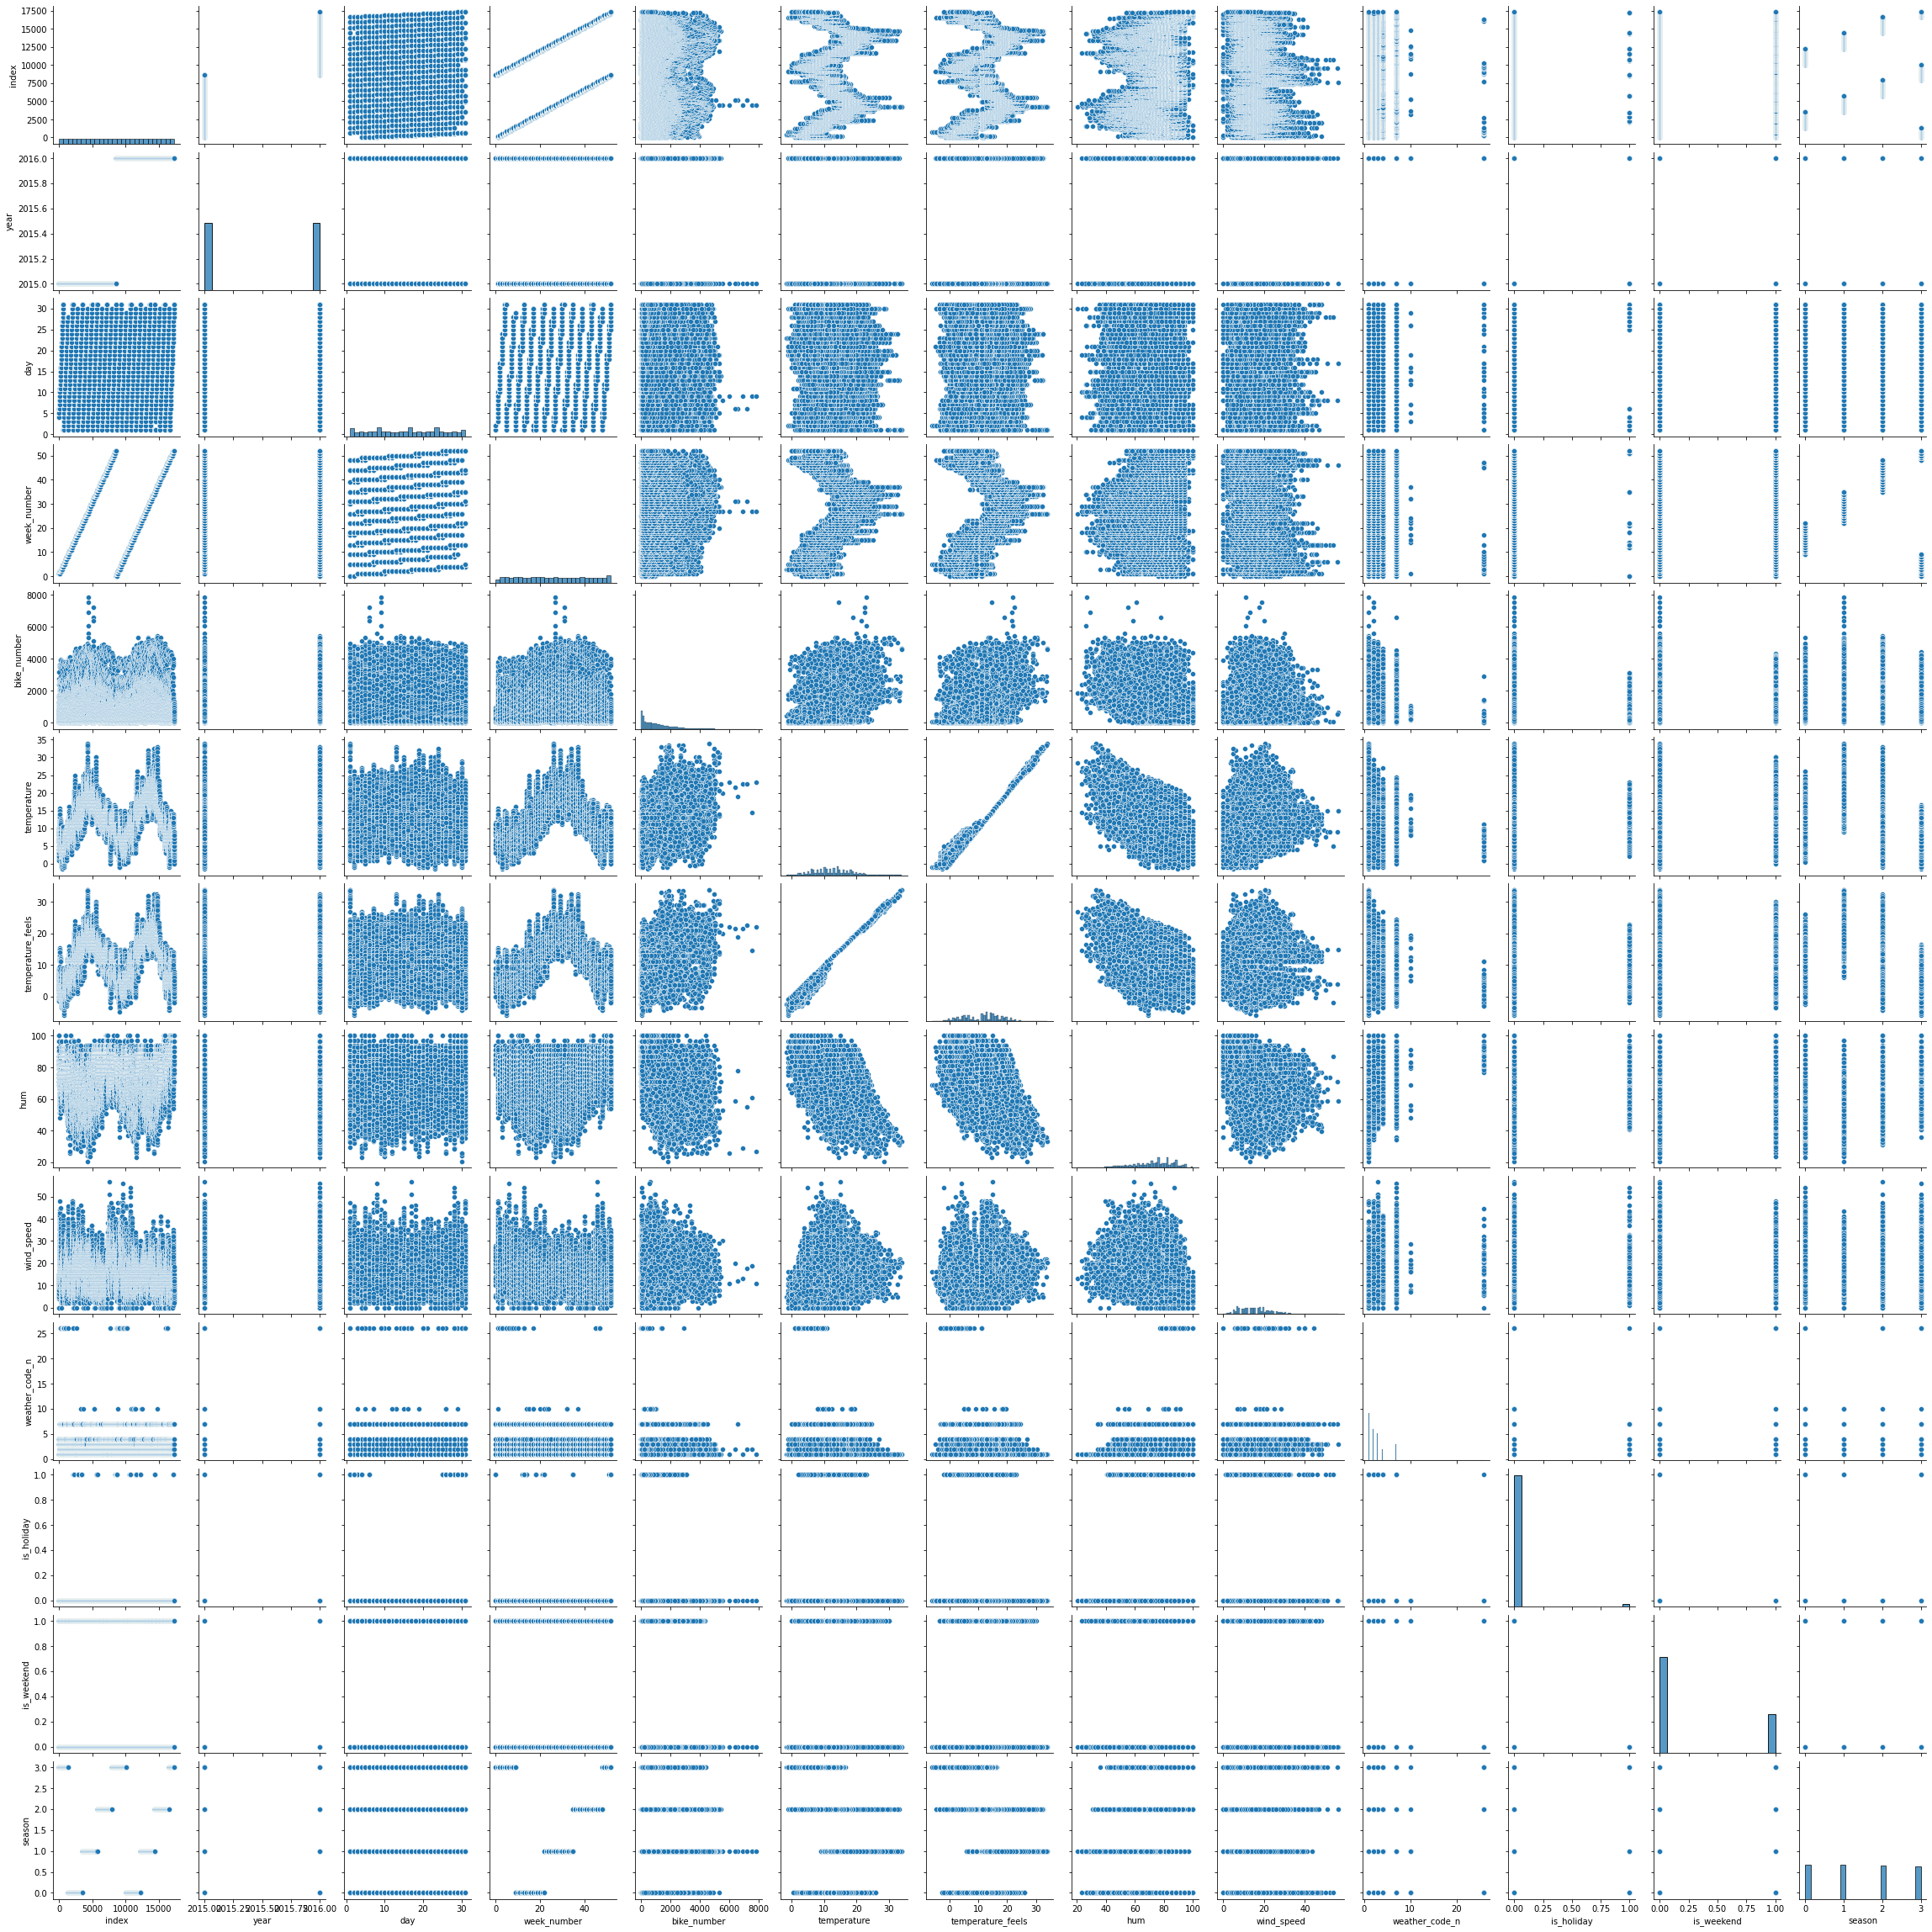

In [6]:
sns.pairplot(df)

<AxesSubplot:>

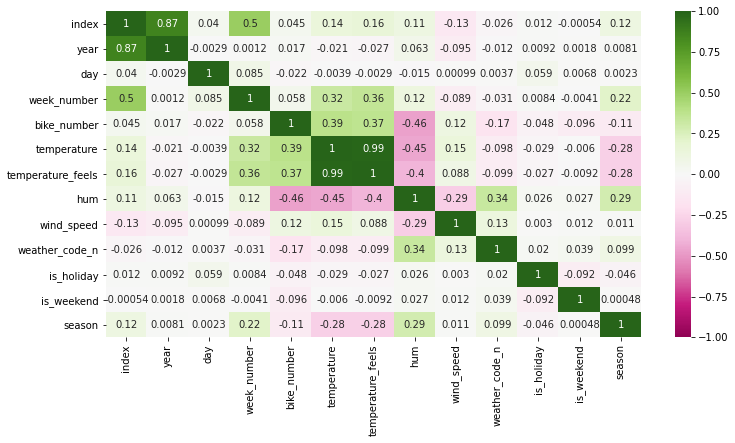

In [7]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='PiYG', vmin=-1, annot=True)

## Order Days of the week for future plots with PD.Categorical

In [8]:
df['day_name'] = pd.Categorical(df['day_name'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

 ## Full Dataset Week Days

### Full Dataset Week Days YEAR 2015 and Year 2016

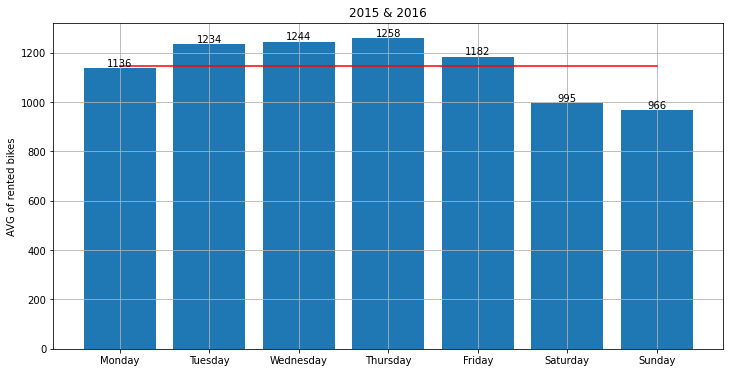

In [9]:
fig, ax = plt.subplots(1, figsize=(12,6))

y = [df['bike_number'].mean() for i in range(7)]
plt.plot(y, 'r')
x = df.groupby('day_name').bike_number.agg('mean')
rects = ax.bar(x.index, x.values)
plt.title('2015 & 2016')
plt.ylabel('AVG of rented bikes')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects)
plt.grid()
plt.savefig('.\Isra_plots/avg_year_day_singleplot.png', dpi = 500);
plt.show()


### Full Dataset Week Days per Year - Subplot 2015 - 2016

In [10]:
x_2015 = (df.loc[df['year']==2015].groupby('day_name').bike_number.agg('mean').round()).astype('int64')

In [11]:
x_2016 = (df.loc[df['year']==2016].groupby('day_name').bike_number.agg('mean').round()).astype('int64')

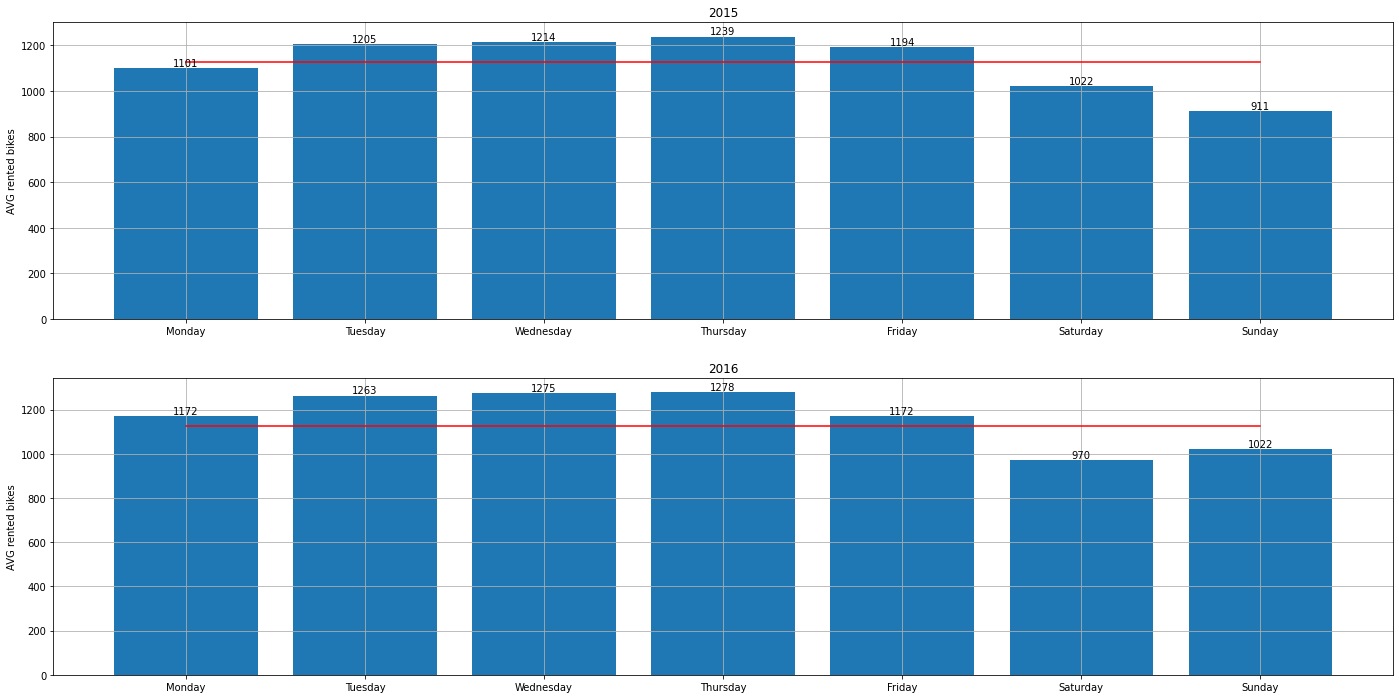

In [12]:
fig, ax = plt.subplots(2, figsize=(24,12))
y = [x_2015.values.mean() for i in range(7)]
j = [x_2015.values.mean() for i in range(7)]
ax[0].grid()
ax[0].plot(y, 'r')
ax[0].title.set_text('2015')
ax[0].set_ylabel('AVG rented bikes')

rects1 = ax[0].bar(x_2015.index, x_2015.values)
ax[1].grid()
ax[1].plot(j, 'r')
rects2 = ax[1].bar(x_2016.index, x_2016.values)
ax[1].title.set_text('2016')
ax[1].set_ylabel('AVG rented bikes')
def autolabel1(rects1):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects1:
        height = rect.get_height()
        ax[0].text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')
def autolabel2(rects2):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects2:
        height = rect.get_height()
        ax[1].text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel1(rects1)
autolabel2(rects2)
plt.savefig('.\Isra_plots/avg_year_day_subplot2015&2016.png', dpi = 500);

# Conclussions:

* 1- The weekdays are having higher usage of bicycles for 2015 - 2016 
* 2- Both Years the day with higher average of bikes usage is Thursday
* 3- There is difference between 2015 and 2016 usage during weekends, in 2015 Saturday had more bikes usages on Saturday but in 2017 the higher inflow during the weekend was on Sunday

# Now I want to focus in usage per year and hour 

https://medium.com/analytics-vidhya/probability-distributions-and-hypothesis-tests-using-python-2ee25cb3a90f

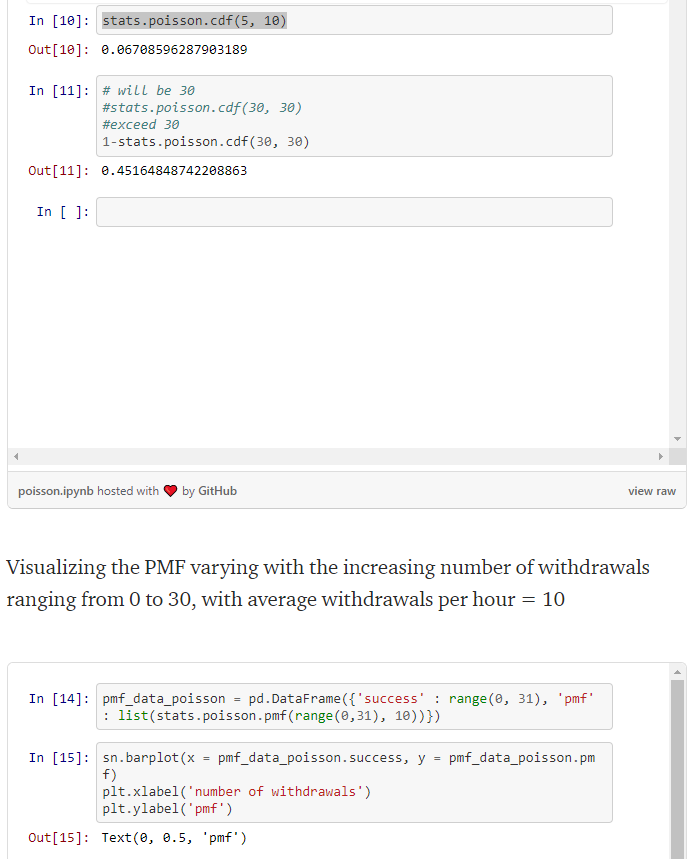

## Change the time format to int64 to better plot

In [13]:
df['time'] = pd.to_datetime(df['time'])

In [14]:
df['time_hour'] = df.time.apply(lambda x : x.strftime('%H'))

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [16]:
df['time_hour_number'] = df.timestamp.apply(lambda x : x.strftime('%H:%M'))

In [17]:
df['time_hour_number'] = df['time_hour_number'].astype('int64')

In [18]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour,time_hour_number
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 00:00:00,182,...,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0,00,0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 01:00:00,138,...,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0,01,1
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 02:00:00,134,...,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0,02,2
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 03:00:00,72,...,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0,03,3
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 04:00:00,47,...,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0,04,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 19:00:00,493,...,6.0,82.0,17.0,Cloudy,4,0.0,1.0,3.0,19,19
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 20:00:00,465,...,6.5,84.5,13.0,Cloudy,4,0.0,1.0,3.0,20,20
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 21:00:00,474,...,6.0,87.0,12.0,Cloudy,4,0.0,1.0,3.0,21,21
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 22:00:00,587,...,6.0,90.0,12.0,Cloudy,4,0.0,1.0,3.0,22,22


In [19]:
years_hour = (df.groupby('time_hour_number').bike_number.agg('mean').round()).astype('int64')

In [20]:
years_hour = pd.DataFrame(years_hour)

In [21]:
h_2015_2016 = (df.groupby('time_hour_number').bike_number.agg('mean').round()).astype('int64')
h_2015_2016 = pd.DataFrame(h_2015_2016)
h_2015= df.loc[df['year']==2015].groupby('time_hour_number').bike_number.agg('mean').round().astype('int64')
h_2015=pd.DataFrame(h_2015)
h_2016= df.loc[df['year']==2016].groupby('time_hour_number').bike_number.agg('mean').round().astype('int64')
h_2016=pd.DataFrame(h_2016)

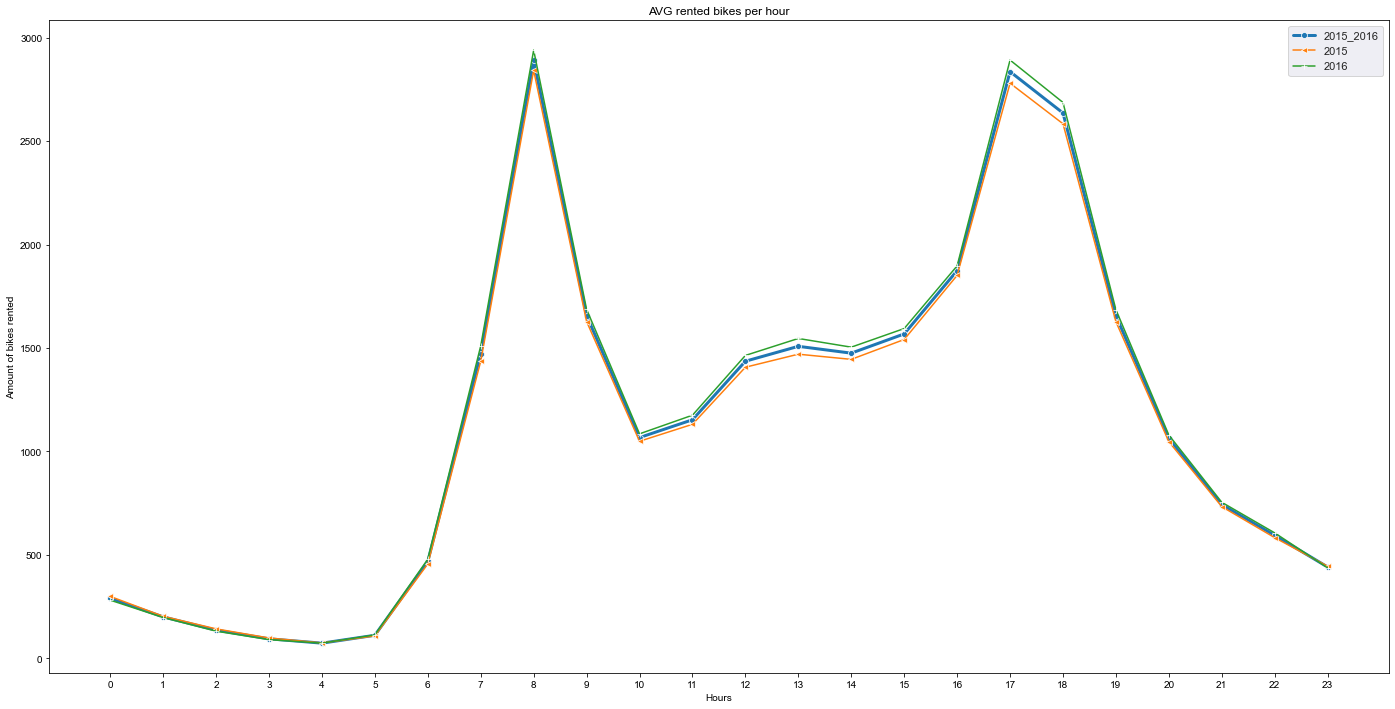

In [22]:
fig=plt.figure(figsize=(24,12))
plt.grid()
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
p_h_2015_2016 =sns.lineplot(data=h_2015_2016, y=h_2015_2016['bike_number'], x='time_hour_number', lw=3, marker='o')
p_h_2015 = sns.lineplot(data=h_2015, y=h_2015['bike_number'], x='time_hour_number', marker='<')
p_h_2016 = sns.lineplot(data=h_2016, y=h_2016['bike_number'], x='time_hour_number', marker='+')
plt.legend(('2015_2016', '2015', '2016'))
p_h_2015_2016.set(xticks=h_2015_2016.index)
plt.grid()
p_h_2015_2016.title.set_text('AVG rented bikes per hour')
p_h_2015_2016.set_xlabel('Hours')
p_h_2015_2016.set_ylabel('Amount of bikes rented')
plt.show()


In [23]:
h_2015_2016.bike_number.values

array([ 290,  200,  136,   94,   73,  111,  468, 1473, 2890, 1657, 1067,
       1153, 1436, 1508, 1475, 1568, 1874, 2836, 2636, 1656, 1063,  743,
        594,  441], dtype=int64)

In [24]:
def add_value_labels(ax, typ, spacing=5):
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)   



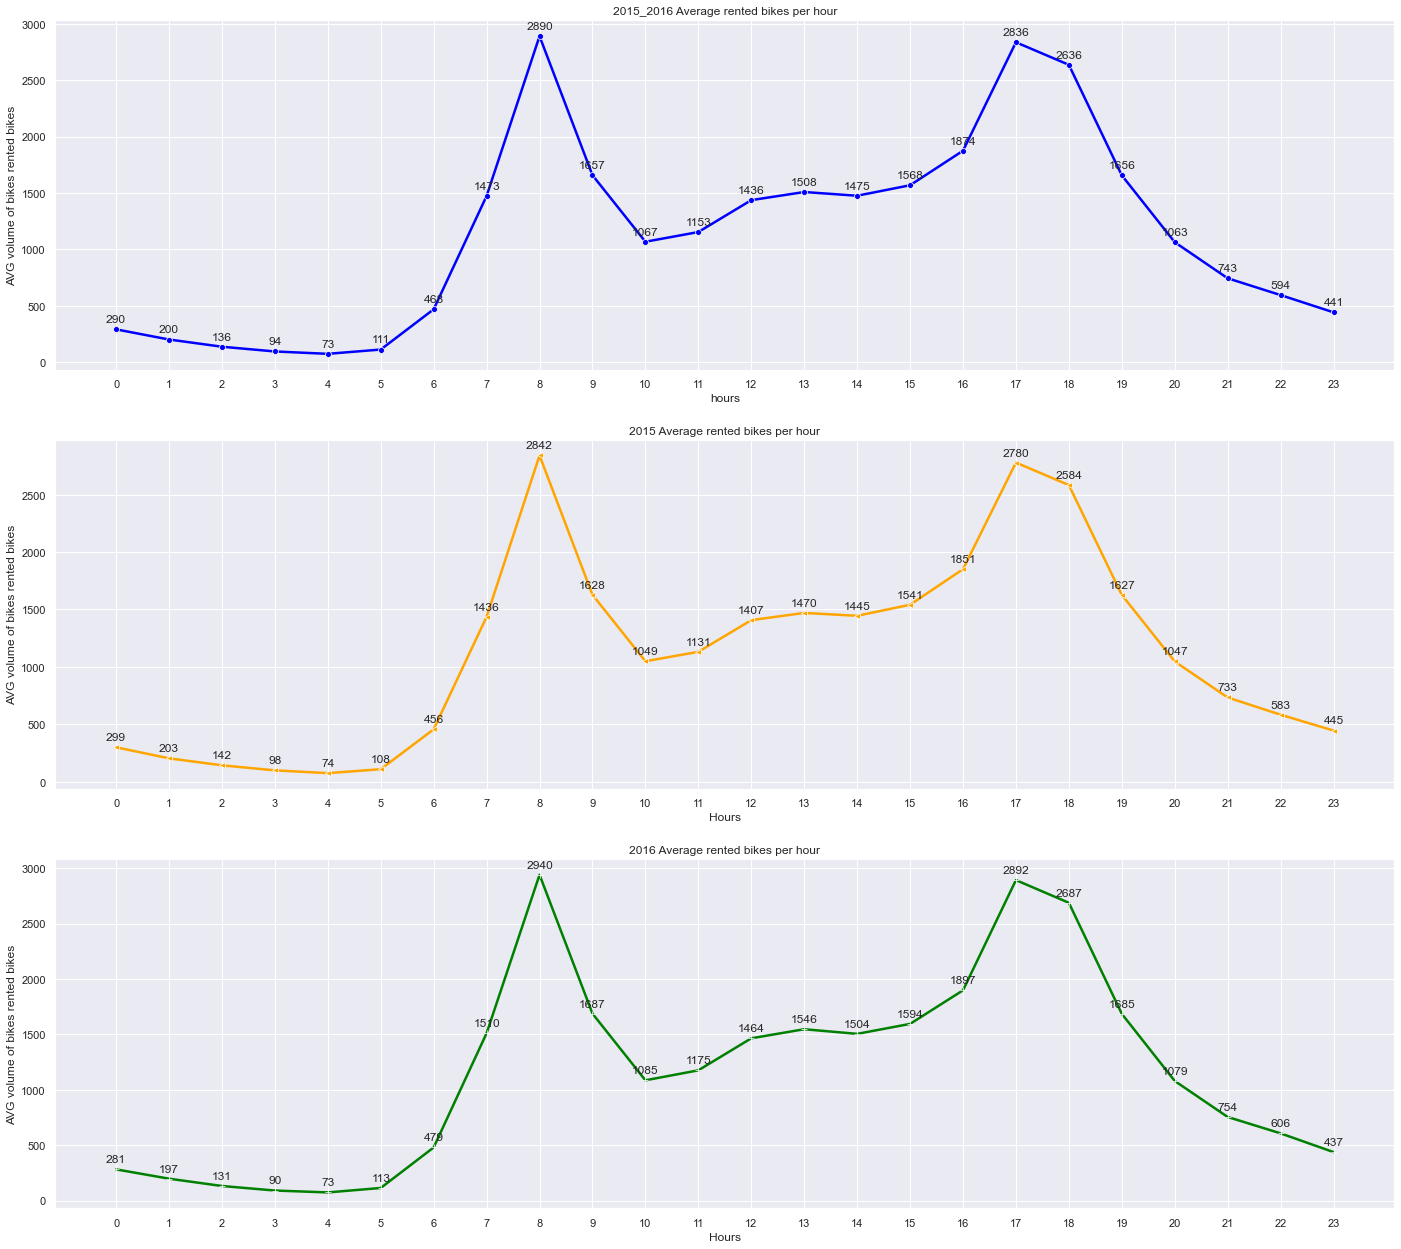

In [25]:
fig, ax = plt.subplots(3, figsize=(24,12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=4, hspace=None)
ax[0].grid()
p_h_2015_2016 = sns.lineplot(data=h_2015_2016, y=h_2015_2016['bike_number'], x='time_hour_number', lw=2.5, marker='o', ax=ax[0], color='blue')
ax[0].set_xlabel('hours')
ax[0].grid()
ax[0].set(xticks=h_2015_2016.index)
add_value_labels(ax[0], typ='line')
ax[0].title.set_text('2015_2016 Average rented bikes per hour')
ax[0].set_ylabel('AVG volume of bikes rented bikes')
ax[1].grid()
p_h_2015 = sns.lineplot(data=h_2015, y=h_2015['bike_number'], x='time_hour_number', marker='<', ax=ax[1], lw=2.5, color='orange')
ax[1].title.set_text('2015 Average rented bikes per hour')
ax[1].set_xlabel('Hours')
ax[1].grid()
ax[1].set(xticks=h_2015_2016.index)
add_value_labels(ax[1], typ='line')
ax[1].set_ylabel('AVG volume of bikes rented bikes')
ax[2].grid()
p_h_2016 = sns.lineplot(data=h_2016, y=h_2016['bike_number'], x='time_hour_number', marker='+', ax=ax[2], lw=2.5, color='green')
ax[2].title.set_text('2016 Average rented bikes per hour')
ax[2].set_xlabel('Hours')
ax[2].grid()
ax[2].set(xticks=h_2015_2016.index)
add_value_labels(ax[2], typ='line')
ax[2].set_ylabel('AVG volume of bikes rented bikes')
plt.savefig('.\Isra_plots/avg_year_hour_subplots_lines_2015&2016.png', dpi = 500);



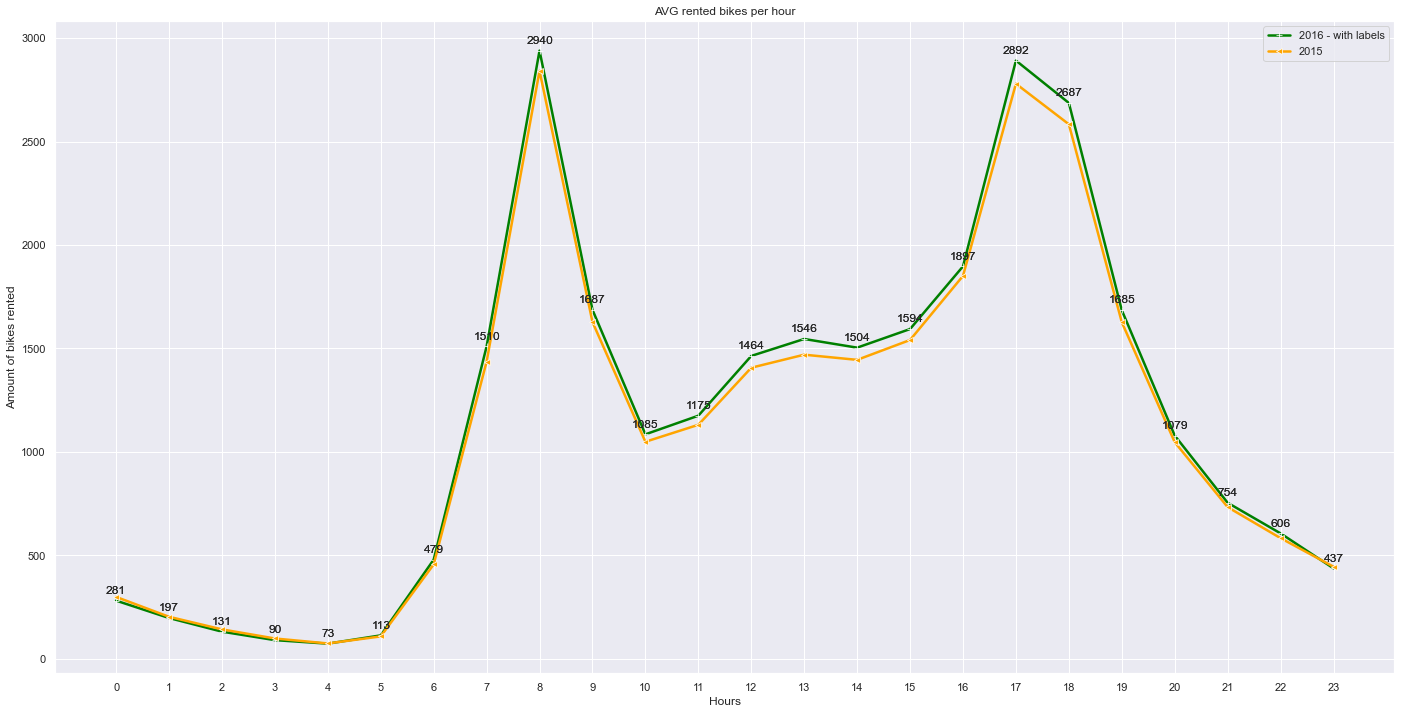

In [26]:
fig=plt.figure(figsize=(24,12))
plt.grid()
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
p_h_2016 = sns.lineplot(data=h_2016, y=h_2016['bike_number'], x='time_hour_number', marker='+', lw=2.5, color='green')
add_value_labels(p_h_2016, typ='line')
p_h_2015 = sns.lineplot(data=h_2015, y=h_2015['bike_number'], x='time_hour_number', marker='<', lw=2.5, color='orange')
plt.legend(('2016 - with labels', '2015'))
p_h_2016.set(xticks=h_2015.index)
plt.grid()
p_h_2016.title.set_text('AVG rented bikes per hour')
p_h_2016.set_xlabel('Hours')
p_h_2016.set_ylabel('Amount of bikes rented')
add_value_labels(p_h_2016, typ='line')
plt.savefig('.\Isra_plots/avg_year_hour_lineplot2015&2016.png', dpi = 500);
plt.show()

In [ ]:
df

# Conclussions:

* 1- The amount of rented bicycles per hours is almost the same in 2015 - 2016 / there is an small increase in 2016
* 2- The peak moments of the day start at 07 and finalize at 10 in the morning and it start at 16:00 and fnalize at 20:00 
* 2.1- Peak moments could happend due to work commuting. 

# Now I want to focus in usage per year and month 

In [27]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour,time_hour_number
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 00:00:00,182,...,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0,00,0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 01:00:00,138,...,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0,01,1
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 02:00:00,134,...,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0,02,2
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 03:00:00,72,...,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0,03,3
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 04:00:00,47,...,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0,04,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 19:00:00,493,...,6.0,82.0,17.0,Cloudy,4,0.0,1.0,3.0,19,19
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 20:00:00,465,...,6.5,84.5,13.0,Cloudy,4,0.0,1.0,3.0,20,20
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 21:00:00,474,...,6.0,87.0,12.0,Cloudy,4,0.0,1.0,3.0,21,21
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 22:00:00,587,...,6.0,90.0,12.0,Cloudy,4,0.0,1.0,3.0,22,22


* First I will secure the order of the plot assiging the categorical variable ordered

In [28]:
df.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [29]:
df['month'] = pd.Categorical(df['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'])

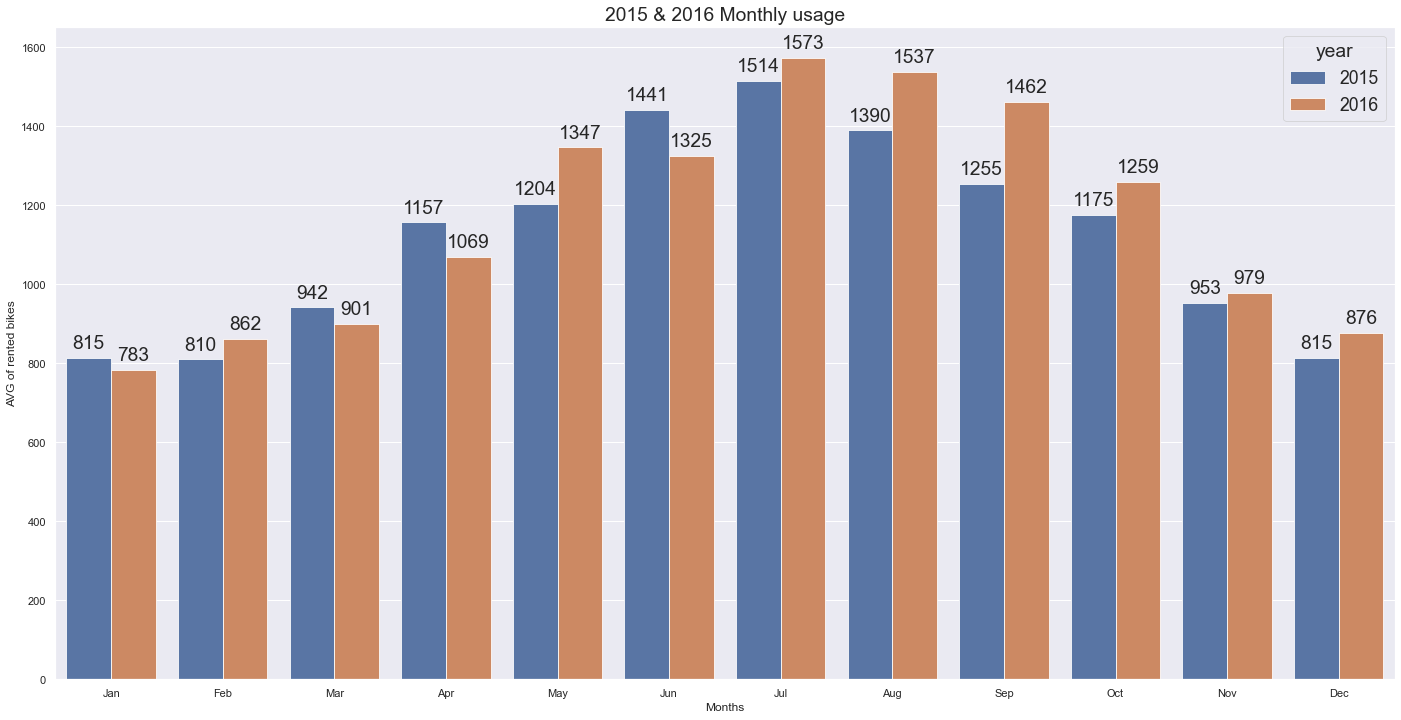

In [30]:
fig=plt.figure(figsize=(24,12))
plt.grid()
sns.set(context='paper', style='darkgrid', palette='deep', font='sans-serif', font_scale=2, color_codes=False, rc=None);
plt.grid()
m_2015_2016 = sns.barplot(x = 'month', y = df['bike_number'], hue = 'year', data = df, ci = None)
add_value_labels(m_2015_2016, typ='bar')
plt.title('2015 & 2016 Monthly usage');
plt.ylabel('AVG of rented bikes');
plt.xlabel('Months');
plt.savefig('.\Isra_plots/avg_year_month_lineplot2015&2016.png', dpi = 500);
plt.show()

In [31]:
m_2015_2016 = (df.groupby('month').bike_number.agg('mean').round()).astype('int64')
m_2015_2016 = pd.DataFrame(m_2015_2016)
m_2015= df.loc[df['year']==2015].groupby('month').bike_number.agg('mean').round().astype('int64')
m_2015=pd.DataFrame(m_2015)
m_2016= df.loc[df['year']==2016].groupby('month').bike_number.agg('mean').round().astype('int64')
m_2016=pd.DataFrame(m_2016)

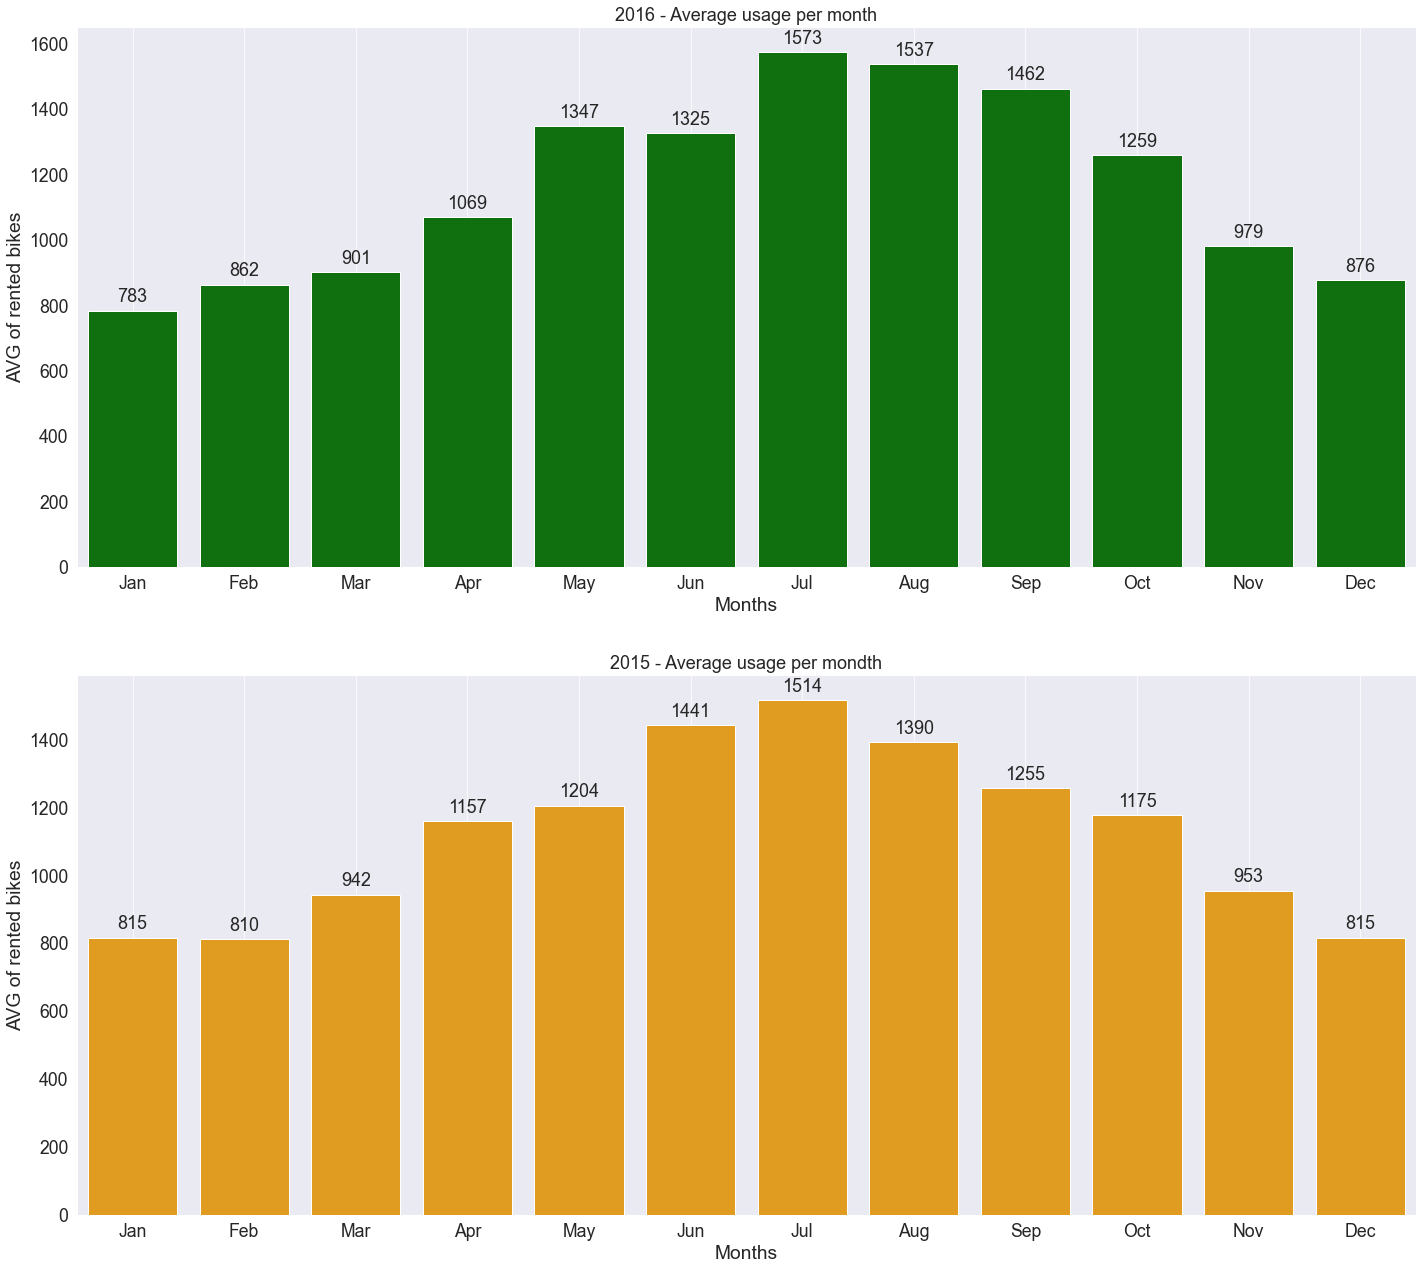

In [32]:
fig, ax = plt.subplots(2, figsize=(24,12))
plt.grid()
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=4, hspace=0.2)
sns.set(font_scale=1.5, color_codes=False, rc=None)
m_h_2016 = sns.barplot(y=m_2016['bike_number'], x=m_2016.index, color='green', ax=ax[0])
plt.grid()
add_value_labels(m_h_2016, typ='bar')
ax[0].set_title('2016 - Average usage per month')
ax[0].set_ylabel('AVG of rented bikes')
ax[0].set_xlabel('Months')
ax[0].grid()
m_h_2015 = sns.barplot(y=m_2015['bike_number'], x=m_2015.index, color='orange',ax=ax[1])
add_value_labels(m_h_2015, typ='bar')
ax[1].set_title('2015 - Average usage per mondth')
ax[1].set_ylabel('AVG of rented bikes')
ax[1].set_xlabel('Months')
plt.grid()
plt.savefig('.\Isra_plots/avg_year_month_subplots_lines_2015&2016.png', dpi = 500);

### Conclussions 

* 1 - From March to July the usage increase. 
* 2 - June, July and August are the months wiht higher volume of bike rented. 
* 3 - Hypotesis: Spring and Summer are the months with higher consumation. The assumption is the higher temperatures makes the usage of the bikes more enjoyable.
* 3.1 - The hypotesis needs to be validated with Daniel analyis.   

# Now I want to focus in usage weekday or weekend

In [33]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour,time_hour_number
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 00:00:00,182,...,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0,00,0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 01:00:00,138,...,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0,01,1
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 02:00:00,134,...,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0,02,2
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 03:00:00,72,...,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0,03,3
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 04:00:00,47,...,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0,04,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 19:00:00,493,...,6.0,82.0,17.0,Cloudy,4,0.0,1.0,3.0,19,19
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 20:00:00,465,...,6.5,84.5,13.0,Cloudy,4,0.0,1.0,3.0,20,20
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 21:00:00,474,...,6.0,87.0,12.0,Cloudy,4,0.0,1.0,3.0,21,21
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 22:00:00,587,...,6.0,90.0,12.0,Cloudy,4,0.0,1.0,3.0,22,22


In [34]:
w_2015_2016 = (df.groupby('is_weekend').bike_number.agg('mean').round()).astype('int64')

In [35]:
w_2015_2016

is_weekend
0.0    1211
1.0     981
Name: bike_number, dtype: int64

In [36]:
w_2015_2016 = (df.groupby('is_weekend').bike_number.agg('mean').round()).astype('int64')
w_2015_2016 = pd.DataFrame(w_2015_2016)
w_2015= df.loc[df['year']==2015].groupby('is_weekend').bike_number.agg('mean').round().astype('int64')
w_2015=pd.DataFrame(w_2015)
w_2016= df.loc[df['year']==2016].groupby('is_weekend').bike_number.agg('mean').round().astype('int64')
w_2016=pd.DataFrame(w_2016)


In [37]:
dct= {0: 'weekday', 1:'weekend'}

In [38]:
w_2015_2016 = w_2015_2016.reset_index()
w_2015_2016['is_weekend']=w_2015_2016['is_weekend'].map(dct)
w_2015 = w_2015.reset_index()
w_2015['is_weekend']=w_2015['is_weekend'].map(dct)
w_2016 = w_2016.reset_index()
w_2016['is_weekend']=w_2016['is_weekend'].map(dct)


In [39]:
w_2015_2016['is_weekend']=w_2015_2016['is_weekend'].astype('str')

In [40]:
w_2015_2016['bike_number'][0]+w_2015_2016['bike_number'][1]

2192

## Donughts Plots per year and weekday vs Weeked 

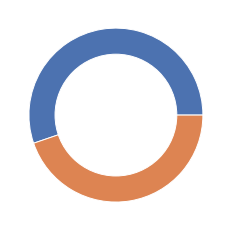

In [41]:
plt.pie(x=w_2015_2016['bike_number'], normalize=True);
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

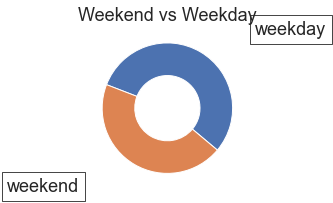

In [42]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


wedges, texts = ax.pie(w_2015_2016['bike_number'], wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(w_2015_2016['is_weekend'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Weekend vs Weekday")

plt.show()

```Pyhthon
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


w_2015_2016_data = [x for x in w_2015_2016['bike_number']]
w_2015_2016_list = [x for x in w_2015_2016['is_weekend']]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax[0].pie(w_2015_2016_data, autopct=lambda pct: func(pct, w_2015_2016_data),
                                  textprops=dict(color="w"))

ax[0].legend(wedges, w_2015_2016_list,
          title="Weekend vs Weekdays",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")
my_circle=plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ax.set_title("Weekend vs Weekdays 2016&2017")

plt.show()
```

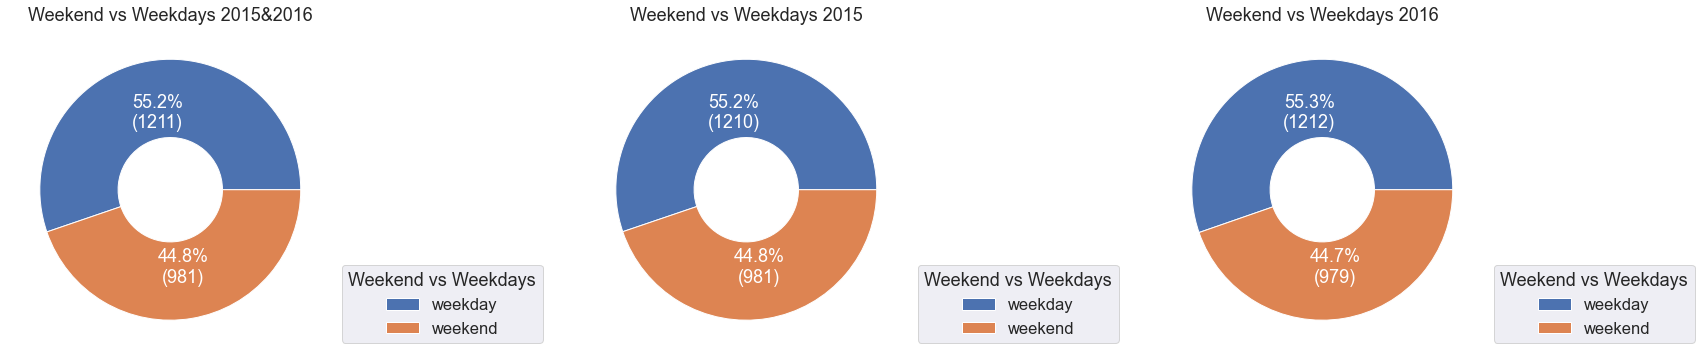

In [43]:
fig, ax = plt.subplots(1,3, figsize=(12, 6), subplot_kw=dict(aspect="equal"));
plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=0, hspace=None);

w_2015_2016_data = [x for x in w_2015_2016['bike_number']]
w_2015_2016_list = [x for x in w_2015_2016['is_weekend']]
w_2015_data = [x for x in w_2015['bike_number']]
w_2015_list = [x for x in w_2015['is_weekend']]
w_2016_data = [x for x in w_2016['bike_number']]
w_2016_list = [x for x in w_2016['is_weekend']]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax[0].pie(w_2015_2016_data, wedgeprops=dict(width=.6), autopct=lambda pct: func(pct, w_2015_2016_data),
                                  textprops=dict(color="w"))
ax[0].legend(wedges, w_2015_2016_list,
          title="Weekend vs Weekdays",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 0.3))
ax[0].set_title("Weekend vs Weekdays 2015&2016")


wedges, texts, autotexts = ax[1].pie(w_2015_data, wedgeprops=dict(width=.6), autopct=lambda pct: func(pct, w_2015_2016_data),
                                  textprops=dict(color="w"))
ax[1].legend(wedges, w_2015_list,
          title="Weekend vs Weekdays",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 0.3))
ax[1].set_title("Weekend vs Weekdays 2015")


wedges, texts, autotexts = ax[2].pie(w_2016_data, wedgeprops=dict(width=.6), autopct=lambda pct: func(pct, w_2015_2016_data),
                                  textprops=dict(color="w"));
ax[2].legend(wedges, w_2016_list,
          title="Weekend vs Weekdays",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 0.3))
ax[2].set_title("Weekend vs Weekdays 2016");

plt.savefig('.\Isra_plots/avg_year_subplots_Donughts_WeekdayvsWeekend.png', dpi = 500);

plt.show();

In [44]:
##

### Now I want to focus on Weeksdays, Vacations and holidays per year, I want to diplay a plot bar per year where the vacations is reflected

AttributeError: 'DataFrame' object has no attribute 'bike_number'

In [46]:
df.loc[df['year']==2015]

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour,time_hour_number
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 00:00:00,182,...,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0,00,0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 01:00:00,138,...,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0,01,1
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 02:00:00,134,...,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0,02,2
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 03:00:00,72,...,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0,03,3
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 04:00:00,47,...,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0,04,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,8638,2015-12-31 19:00:00,31-12-2015,2015,Dec,31,Thursday,52,2021-03-09 19:00:00,359,...,6.0,76.0,21.0,Few clouds,2,0.0,0.0,3.0,19,19
8639,8639,2015-12-31 20:00:00,31-12-2015,2015,Dec,31,Thursday,52,2021-03-09 20:00:00,304,...,5.0,82.0,18.0,Clear,1,0.0,0.0,3.0,20,20
8640,8640,2015-12-31 21:00:00,31-12-2015,2015,Dec,31,Thursday,52,2021-03-09 21:00:00,369,...,5.0,73.5,19.5,Clear,1,0.0,0.0,3.0,21,21
8641,8641,2015-12-31 22:00:00,31-12-2015,2015,Dec,31,Thursday,52,2021-03-09 22:00:00,470,...,3.0,76.0,24.0,Clear,1,0.0,0.0,3.0,22,22


In [47]:
df['month']=='Apr'

0        False
1        False
2        False
3        False
4        False
         ...  
17337    False
17338    False
17339    False
17340    False
17341    False
Name: month, Length: 17342, dtype: bool

In [48]:
df.loc[(df['year']==2015)&(df['month']=='Apr')]

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour,time_hour_number
2081,2081,2015-04-01 00:00:00,01-04-2015,2015,Apr,1,Wednesday,13,2021-03-09 00:00:00,155,...,3.0,57.0,29.0,Clear,1,0.0,0.0,0.0,00,0
2082,2082,2015-04-01 01:00:00,01-04-2015,2015,Apr,1,Wednesday,13,2021-03-09 01:00:00,98,...,2.0,61.0,34.0,Clear,1,0.0,0.0,0.0,01,1
2083,2083,2015-04-01 02:00:00,01-04-2015,2015,Apr,1,Wednesday,13,2021-03-09 02:00:00,46,...,1.5,61.5,35.0,Clear,1,0.0,0.0,0.0,02,2
2084,2084,2015-04-01 03:00:00,01-04-2015,2015,Apr,1,Wednesday,13,2021-03-09 03:00:00,30,...,1.0,61.0,31.5,Clear,1,0.0,0.0,0.0,03,3
2085,2085,2015-04-01 04:00:00,01-04-2015,2015,Apr,1,Wednesday,13,2021-03-09 04:00:00,36,...,1.0,61.0,33.0,Clear,1,0.0,0.0,0.0,04,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,2015-04-30 19:00:00,30-04-2015,2015,Apr,30,Thursday,17,2021-03-09 19:00:00,2095,...,12.0,52.5,14.0,Few clouds,2,0.0,0.0,0.0,19,19
2796,2796,2015-04-30 20:00:00,30-04-2015,2015,Apr,30,Thursday,17,2021-03-09 20:00:00,1261,...,11.5,56.0,9.0,Clear,1,0.0,0.0,0.0,20,20
2797,2797,2015-04-30 21:00:00,30-04-2015,2015,Apr,30,Thursday,17,2021-03-09 21:00:00,883,...,11.0,58.0,8.0,Clear,1,0.0,0.0,0.0,21,21
2798,2798,2015-04-30 22:00:00,30-04-2015,2015,Apr,30,Thursday,17,2021-03-09 22:00:00,673,...,8.0,66.5,12.0,Clear,1,0.0,0.0,0.0,22,22


In [49]:
x = df.loc[(df['year']==2015)].pivot_table(index ='day', columns=['is_holiday'], values='bike_number')

In [50]:
x= df.melt(id_vars=['year', 'day', 'day_name', 'is_holiday', 'is_weekend', 'bike_number'])

In [51]:
x =x.reset_index()

In [52]:
holiday = x.pivot_table(index=x.index, columns='is_holiday', values='bike_number')

In [53]:
holiday.rename(columns = {0.0: 'Not_holiday', 1.0: 'Holiday'}, inplace = True)

In [54]:
holiday

is_holiday,Not_holiday,Holiday
0,182.0,NaN
1,138.0,NaN
2,134.0,NaN
3,72.0,NaN
4,47.0,NaN
...,...,...
260125,493.0,NaN
260126,465.0,NaN
260127,474.0,NaN
260128,587.0,NaN


In [55]:
weekend = x.pivot_table(index=x.index, columns='is_weekend', values='bike_number')

In [56]:
weekend.rename(columns = {0.0: 'Not_weekend', 1.0: 'weekend'}, inplace = True)

In [57]:
result = pd.concat([holiday, weekend], axis=1, join="outer")

In [58]:
result.rename(columns = {'weekend': 'Weekend'}, inplace = True)

In [59]:
result.rename(columns = {'Not_weekend': 'Weekday'}, inplace = True)

In [60]:
for i in result.loc[result['Holiday']>0].columns:
    for j,k in enumerate(result.Holiday.values):
            if k == result['Weekday'].iloc[j]:
                result['Weekday'].iloc[j] = np.nan

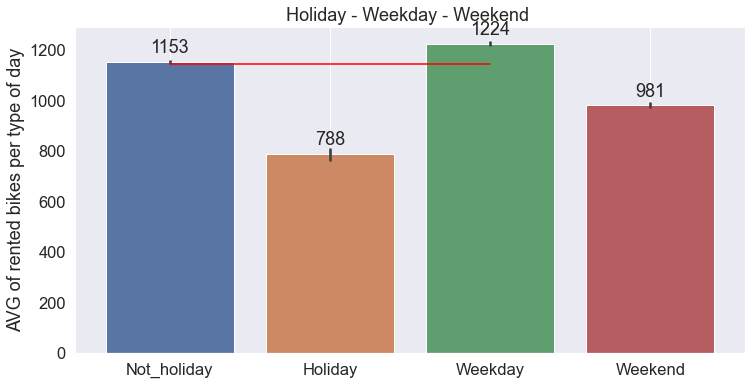

In [72]:
fig, ax = plt.subplots(1, figsize=(12,6))
rects = sns.barplot(data=result)
y = [df['bike_number'].mean() for i in range(3)]
plt.plot(y, 'r')
plt.title('Holiday - Weekday - Weekend ')
plt.ylabel('AVG of rented bikes per type of day')

add_value_labels(rects, typ='bar')
plt.grid()
plt.savefig('.\Isra_plots/avg_year_Holiday-Weekday-Weekend.png', dpi = 500);
plt.show()


def right_columns(n):
    holiday_weekday = []
    holiday_weekend = []
    for i in n.columns:
        if i == 'Holiday':
            for j,k in enumerate(result.Holiday.values):
                if k == result['Weekday'].iloc[j]:
                    holiday_weekday.append(k)
                elif k == result['Weekend'].iloc[j]:
                    holiday_weekend.append(k)
                else: 
                    None
    return holiday_weekday, holiday_weekend
                    

def holiday_weekend(n):
    result['holiday_weekend'] = None
    for i in n.columns:
        if i == 'Holiday':
            for j,k in enumerate(result.Holiday.values):
                if k == result['Weekend'].iloc[j]:
                    result['holiday_weekend'].iloc[j] = k
                else: 
                    None
    return result['holiday_weekend']

drop(['Unnamed: 0'], axis=1, inplace=True)

result.drop(['holiday_weekend'], axis=1, inplace=True)

result['holiday_weekend'] = holiday_weekend(result)

def holiday_weekday(n):
    result['holiday_weekday'] = None
    for i in n.columns:
        if i == 'Holiday':
            for j,k in enumerate(result.Holiday.values):
                if k == result['Not_weekend'].iloc[j]:
                    result['holiday_weekday'].iloc[j] = k
                else: 
                    None
    return result['holiday_weekday']

result['holiday_weekday'] = holiday_weekday(result)

df.loc[result['holiday_weekend'] > 0]

result.apply('mean').plot(kind='bar')
y = [df['bike_number'].mean() for i in range(5)]
plt.plot(y, 'r')

result.sample(60)

### Focus in Subplots by Month per year

In [62]:
month_2015 = (df.loc[df['year']==2015].pivot_table(index ='day', columns=('month'), values='bike_number').round())

In [63]:
month_2015.columns

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=False, name='month', dtype='category')

In [64]:
month_2015

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
day,,,,,,,,,,,,
1,NaN,471.0,652.0,981.0,1232.0,1161.0,1777.0,1792.0,1065.0,1440.0,952.0,1107.0
2,NaN,902.0,927.0,945.0,926.0,1164.0,1594.0,1804.0,1258.0,1479.0,1168.0,1158.0
3,NaN,828.0,994.0,471.0,882.0,1474.0,1650.0,1475.0,1290.0,1206.0,1280.0,1079.0
4,385.0,910.0,1020.0,559.0,1116.0,1644.0,1595.0,1568.0,1238.0,1245.0,978.0,1082.0
5,849.0,883.0,1037.0,807.0,1104.0,1646.0,1238.0,1615.0,930.0,864.0,1021.0,688.0
6,859.0,873.0,1056.0,1060.0,1018.0,1368.0,1609.0,2644.0,1226.0,1079.0,1060.0,645.0
7,916.0,548.0,1140.0,1227.0,1298.0,1475.0,1580.0,1645.0,1320.0,1193.0,620.0,1072.0
8,650.0,657.0,834.0,1277.0,1120.0,1358.0,1738.0,1625.0,1366.0,1403.0,781.0,976.0
9,921.0,994.0,1002.0,1313.0,1159.0,1386.0,3021.0,1685.0,1380.0,1392.0,1186.0,1148.0


In [65]:
month_2015.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
day,,,,,,,,,,,,
1,NaN,471.0,652.0,981.0,1232.0,1161.0,1777.0,1792.0,1065.0,1440.0,952.0,1107.0
2,NaN,902.0,927.0,945.0,926.0,1164.0,1594.0,1804.0,1258.0,1479.0,1168.0,1158.0
3,NaN,828.0,994.0,471.0,882.0,1474.0,1650.0,1475.0,1290.0,1206.0,1280.0,1079.0
4,385.0,910.0,1020.0,559.0,1116.0,1644.0,1595.0,1568.0,1238.0,1245.0,978.0,1082.0
5,849.0,883.0,1037.0,807.0,1104.0,1646.0,1238.0,1615.0,930.0,864.0,1021.0,688.0


C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\israe\mini

<Figure size 432x288 with 0 Axes>

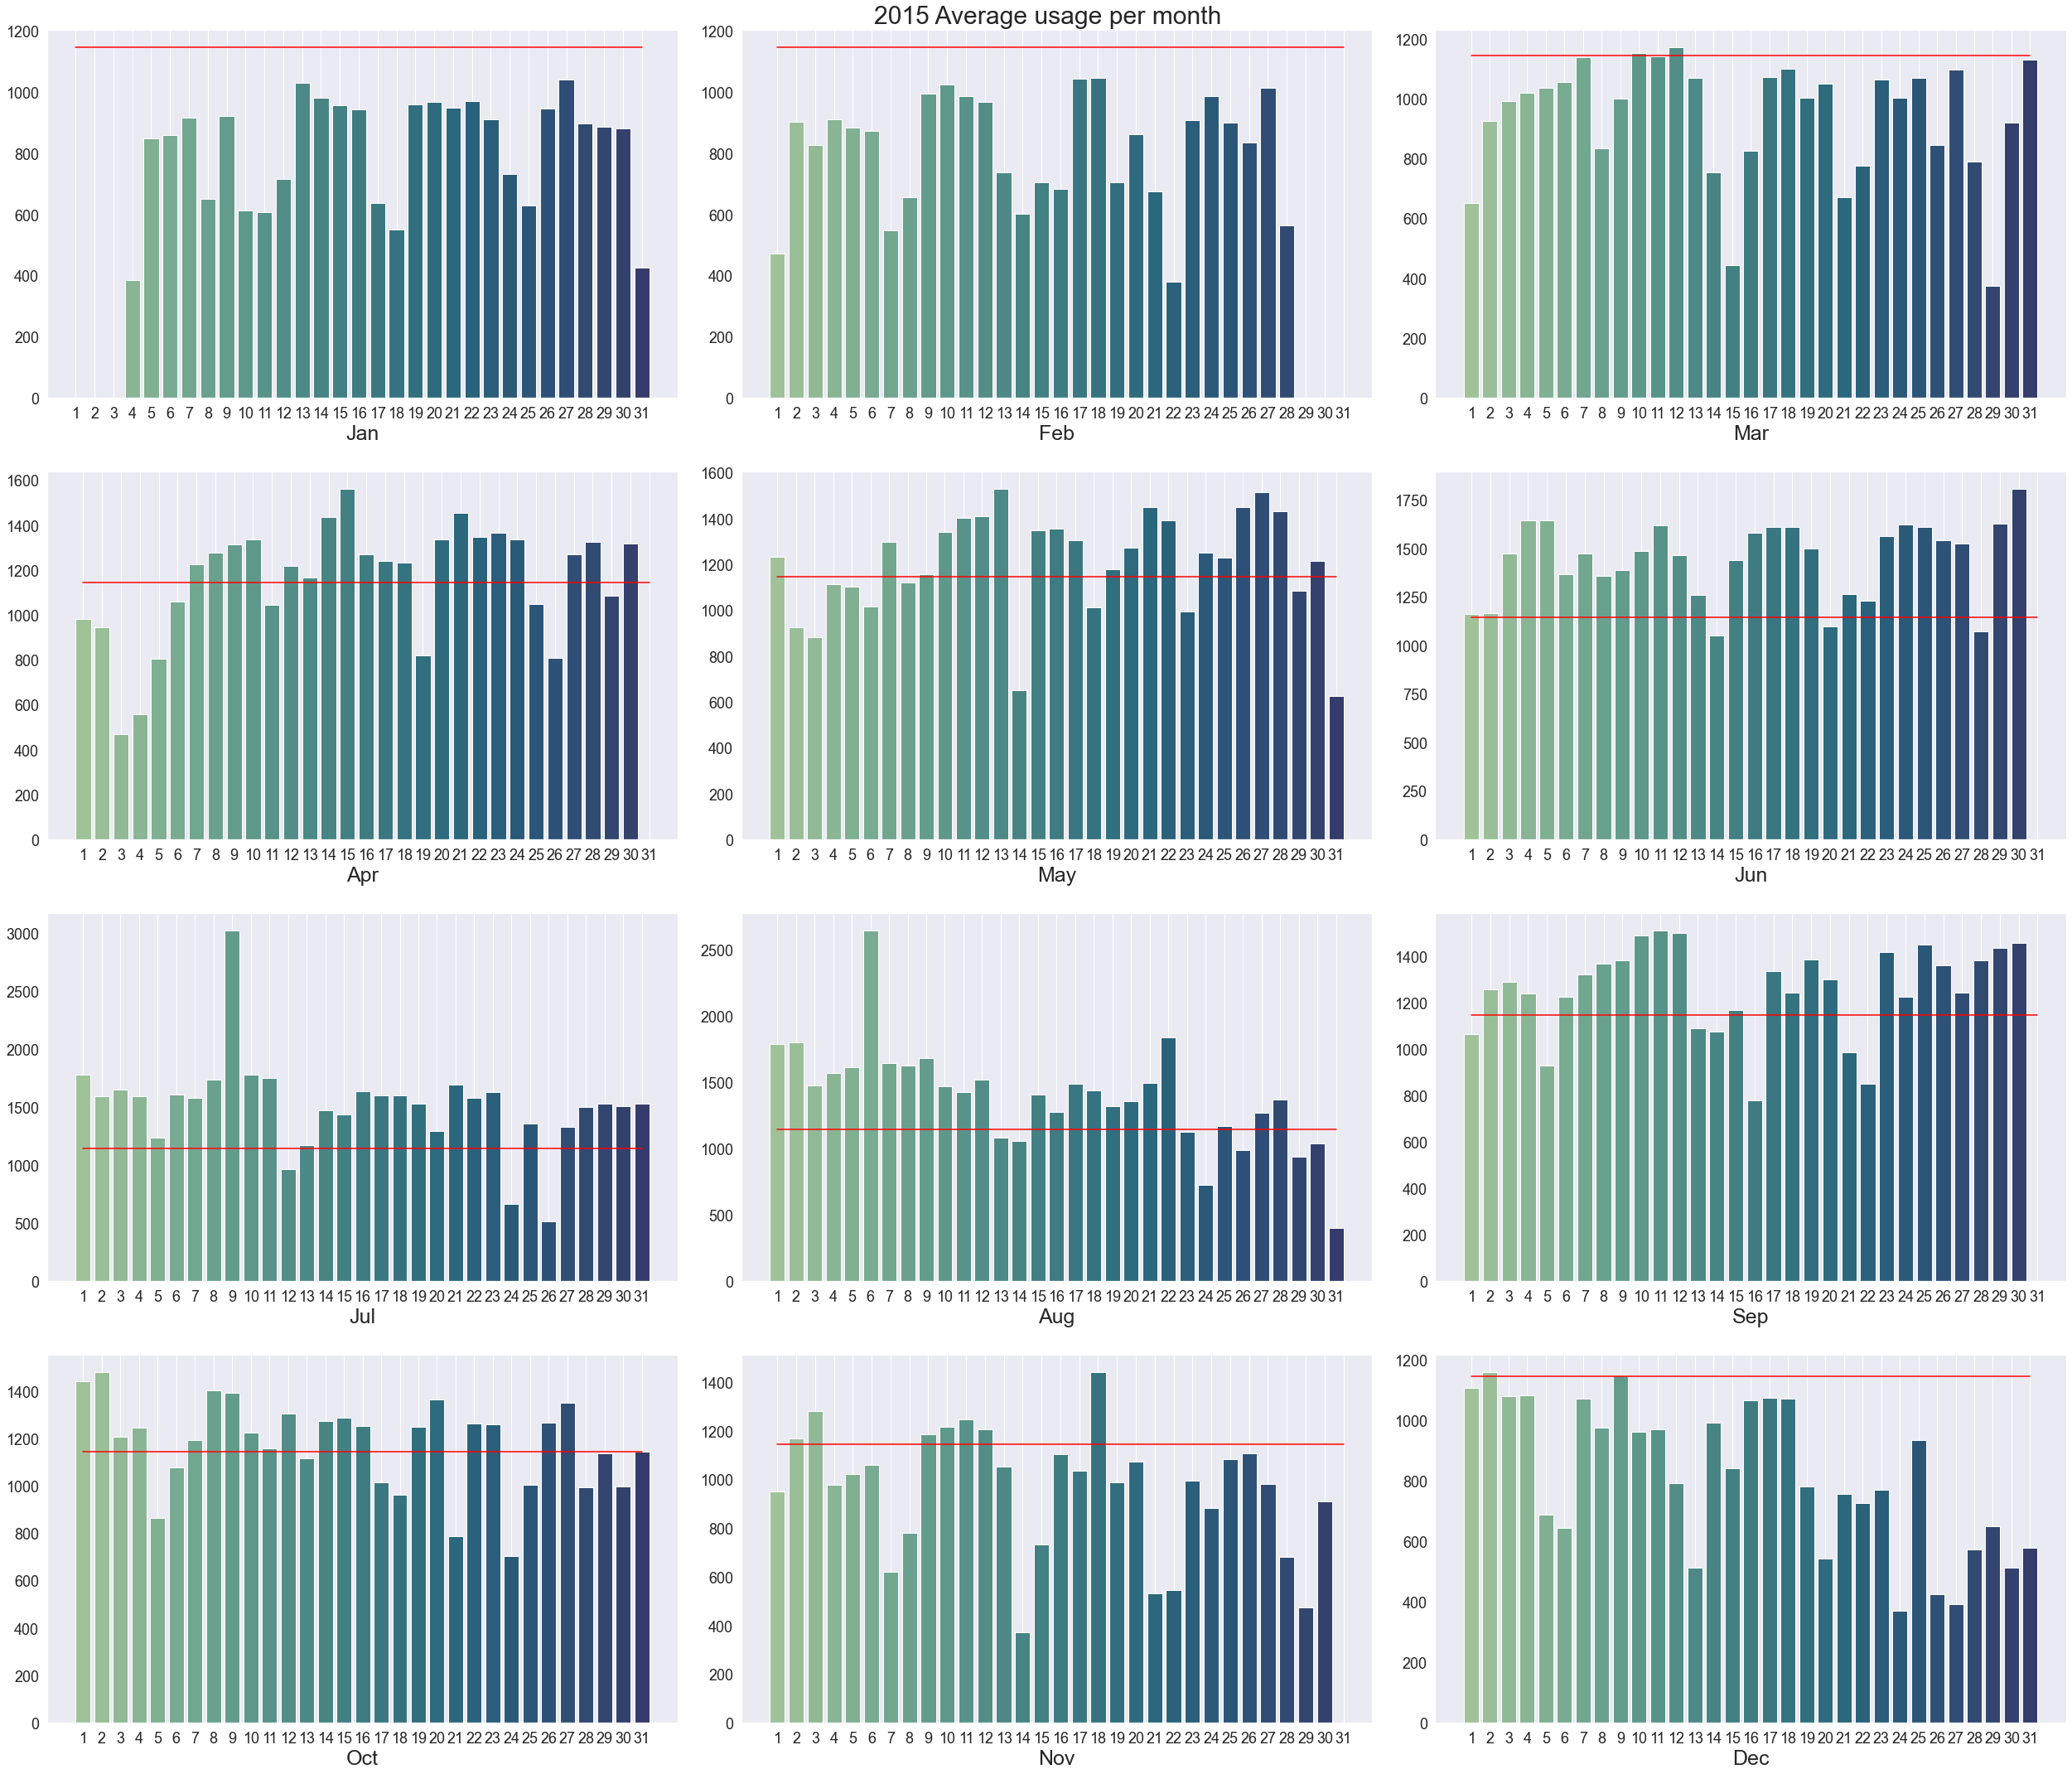

In [66]:
plt.clf();
sns.set_style("darkgrid");

fig, axs = plt.subplots(4,3, figsize=(35, 30), sharex=True, sharey=True);
fig.suptitle('2015 Average usage per month', fontsize=30)
fig.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2);


for i,j in enumerate(month_2015.columns):
    month = month_2015[f'{j}']
    axs = plt.subplot(4,3, i+1)
    axs = sns.barplot(month.index, month.values, palette="crest")
    axs.grid()
    axs.set_xlabel(f'{j}', fontsize=25)
    axs.tick_params(axis='both', which='major', labelsize=18)
    y = [df['bike_number'].mean() for i in range(31)]
    plt.plot(y, 'r')
plt.savefig('.\Isra_plots/avg_year2015_subplots_Day&Month.png', dpi = 500);
plt.show()


### 2016

In [67]:
month_2016 = (df.loc[df['year']==2016].pivot_table(index ='day', columns=('month'), values='bike_number').round())

In [68]:
month_2016.columns

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=False, name='month', dtype='category')

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\israe\mini

<Figure size 432x288 with 0 Axes>

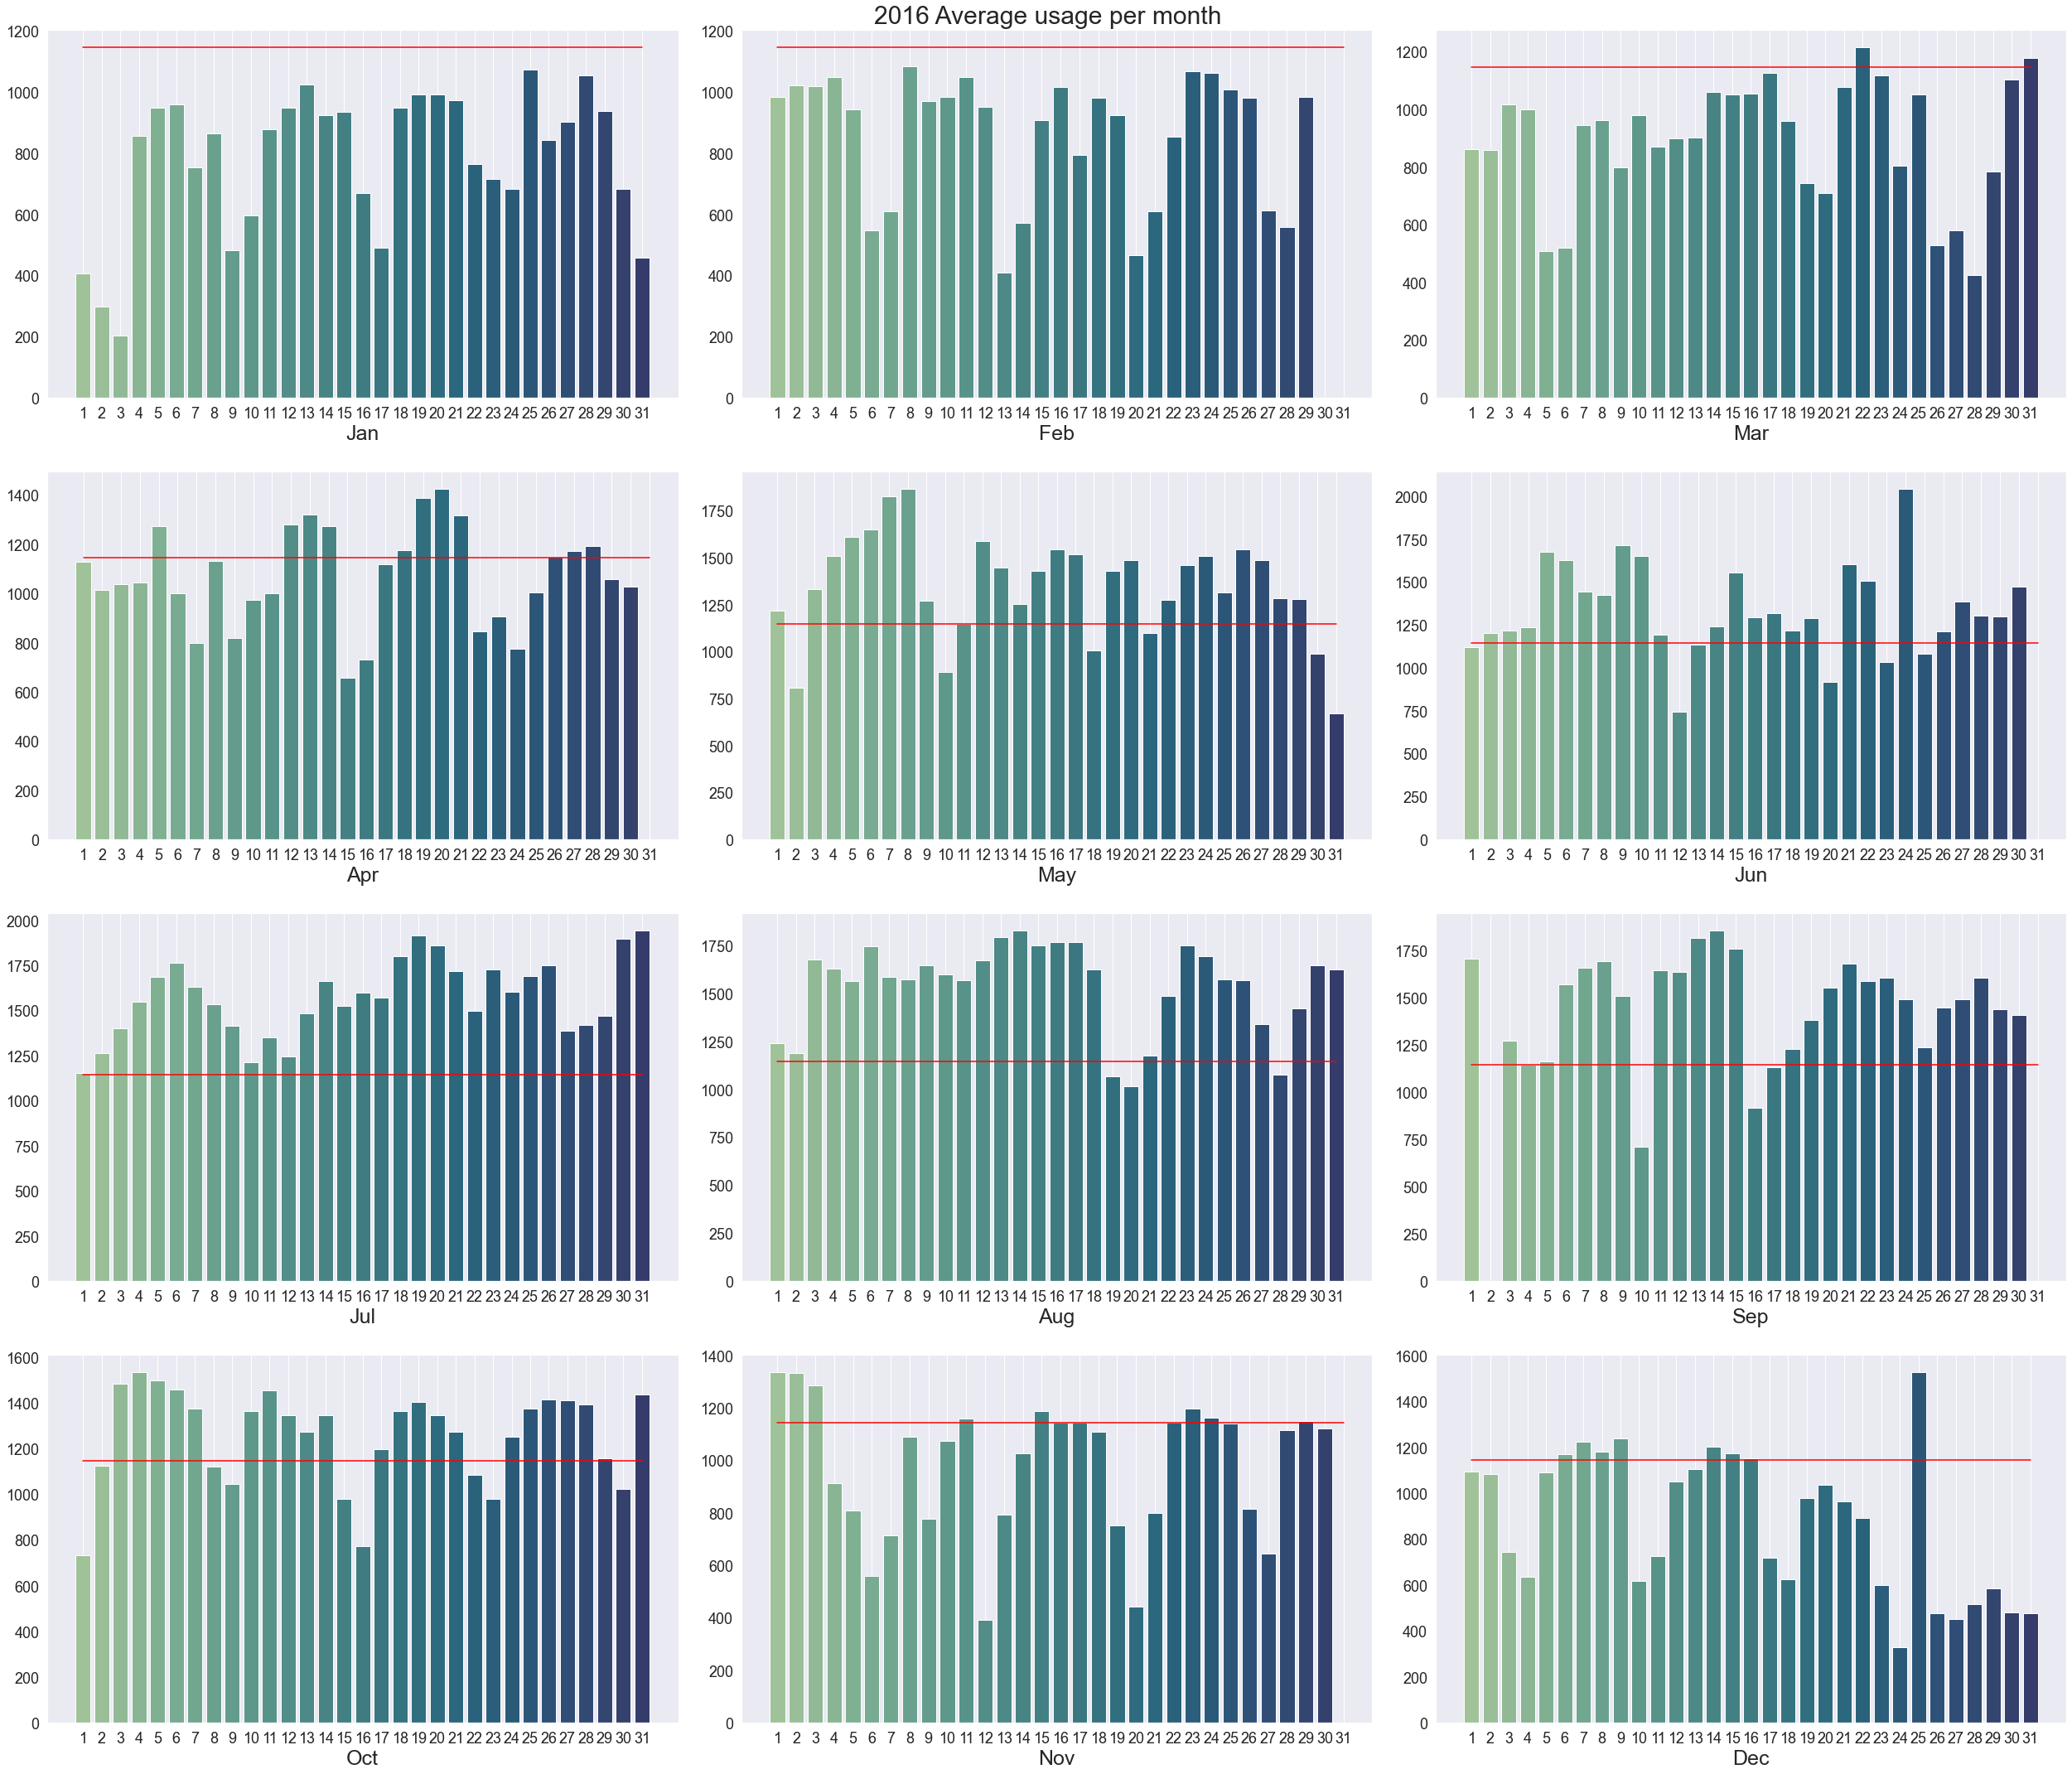

In [69]:
plt.clf();
sns.set_style("darkgrid");

fig, axs = plt.subplots(4,3, figsize=(35, 30), sharex=True, sharey=True);
fig.suptitle('2016 Average usage per month', fontsize=30)
fig.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2);


for i,j in enumerate(month_2016.columns):
    month = month_2016[f'{j}']
    axs = plt.subplot(4,3, i+1)
    axs = sns.barplot(month.index, month.values, palette="crest")
    axs.grid()
    axs.set_xlabel(f'{j}', fontsize=25)
    axs.tick_params(axis='both', which='major', labelsize=18)
    y = [df['bike_number'].mean() for i in range(31)]
    plt.plot(y, 'r')
plt.savefig('.\Isra_plots/avg_year2016_subplots_Day&Month.png', dpi = 500);
plt.show()

# Hypotesis Testing

## Two Sample Test Compare 2015  and 2016 

In [71]:
#Are 2015 and 2016 Sample related 

In [ ]:
year = df.pivot_table(index =df.index, columns=('year'), values='bike_number').round()

In [ ]:
year2015 = year.loc[year[2015]>0]
year2016 = year.loc[year[2016]>0]

In [ ]:
year2015.drop([2016], axis=1, inplace=True)
year2016.drop([2015], axis=1, inplace=True)

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

In [ ]:
year.columns = year.columns.map(str)

In [ ]:
ttest_ind(year2015, year2016, equal_var=True)

In [ ]:
ttest_ind(year2015, year2016, equal_var=False)

* Given the pvalue, I reject the Null hyptosesis. The difference between 2 years is statistically significant. And given the sign of the statistics value I conclude that 2016 has hgiher mean than version 2015

### ttest_rel(year2015, year2016) - It doesn't work because sample sizes are different
"""
* Pill for diabetes before and after. TTest rel check if there is a difference on the size-

* before	after
* 0	136.713072	92.432965
* 1	134.735618	105.022643
* 2	127.529115	82.242766
* 3	144.527126	93.607172
* 4	124.214720	103.212223

"""


In [ ]:
np.mean(df['bike_number'])

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:

ttest_1samp(year2015, 1145.6747779956177)

In [ ]:
ttest_1samp(year2016, 1145.6747779956177)

In [84]:
y_std=df.copy()

In [81]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,...,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season,time_hour,time_hour_number
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 00:00:00,182,...,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0,00,0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 01:00:00,138,...,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0,01,1
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 02:00:00,134,...,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0,02,2
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 03:00:00,72,...,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0,03,3
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,2021-03-09 04:00:00,47,...,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0,04,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 19:00:00,493,...,6.0,82.0,17.0,Cloudy,4,0.0,1.0,3.0,19,19
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 20:00:00,465,...,6.5,84.5,13.0,Cloudy,4,0.0,1.0,3.0,20,20
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 21:00:00,474,...,6.0,87.0,12.0,Cloudy,4,0.0,1.0,3.0,21,21
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,2021-03-09 22:00:00,587,...,6.0,90.0,12.0,Cloudy,4,0.0,1.0,3.0,22,22


In [85]:
y_std['bike_number']

0        182
1        138
2        134
3         72
4         47
        ... 
17337    493
17338    465
17339    474
17340    587
17341    697
Name: bike_number, Length: 17342, dtype: int64

### Distribution

In [86]:


import pandas as pd
import numpy as np
import scipy
from scipy import stats

#Please write below the name of the statistical distributions that you would like to check.
#Full list is here: https://docs.scipy.org/doc/scipy/reference/stats.html
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

#Read your data and set y_std to the column that you want to fit.
y_std=df.copy()
y_std=y_std['bike_number']

#-------------------------------------------------
chi_square_statistics = []
size=len(y_std)

# 20 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,20)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))

    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by goodness of fit:')
print ('............................................')
print (results)

(0.13851463729658986, -1.4801507064814763e-24, 2.365885879318644)

(1145.6747779956177, 1085.8920865692035)

(0.09720439086526139, 7860.000000000001, 1.7507836044711285)



C:\Users\israe\miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.8740032935064301, 6.553801575415109, -9.068646068627245e-28, 9692.844569317655)

(1.555318588863063, -71.61654445672762, 701.4040644950594)

(0.0, 7860.0)

(0.9599161937885371, -1.2212887025846313e-11, 1191.4870133826873)

(0.0, 1145.6747779956177)

(5.272079066503009, -3.3241377350278325e-13, 0.40146601131573834)

(2.042151579527003, 1160.0160100137964, 1184.464263563143)

(0.15549866006904078, -1289.9050764309172, 9150.59391164417)


Distributions listed by goodness of fit:
............................................
   Distribution     chi_square
3          beta     518.616906
9      pearson3     731.083910
6         gamma     736.030745
7         expon     966.050019
4      invgauss    5081.606066
1          norm   28521.610715
10       triang   54851.996299
5       uniform   83313.444065
2   weibull_max  154148.920360
0   weibull_min  427070.335945
8       lognorm  478114.835628


In [88]:
results

,Distribution,chi_square
3,beta,518.616906
9,pearson3,731.083910
6,gamma,736.030745
7,expon,966.050019
4,invgauss,5081.606066
1,norm,28521.610715
10,triang,54851.996299
5,uniform,83313.444065
2,weibull_max,154148.920360
0,weibull_min,427070.335945


<AxesSubplot:>

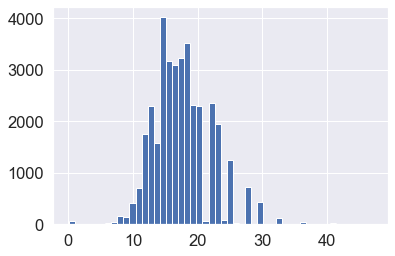

In [90]:
import pandas as pd
df3=pd.read_csv(r'D:\Repositories\data-ft-par-labs\Labs\data/vehicles.csv')
df3['Fuel Barrels/Year'].hist(bins=50)

In [92]:


import pandas as pd
import numpy as np
import scipy
from scipy import stats

#Please write below the name of the statistical distributions that you would like to check.
#Full list is here: https://docs.scipy.org/doc/scipy/reference/stats.html
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

#Read your data and set y_std to the column that you want to fit.
y_std=df3.copy()
y_std=y_std['Fuel Barrels/Year']

#-------------------------------------------------
chi_square_statistics = []
size=len(y_std)

# 20 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,20)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))

    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by goodness of fit:')
print ('............................................')
print (results)

(0.4886706513011116, 0.059999999999999984, 3.60533693979272)

(17.609055502328133, 4.467220557434112)

(0.2735876318836695, 47.087142857142865, 1.5969961408845668)



C:\Users\israe\miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\israe\miniconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(34.7752702307488, 1858372.7370485384, -8.697142463062683, 1406088.6774594835)

(0.03188796506377724, -8.08095858210688, 804.4915662006701)

(0.06, 47.02714285714285)

(42.99772586101156, -11.388824794495953, 0.6744049732460475)

(0.06, 17.549055502328134)

(0.11974088986221015, -19.21525824997613, 36.56012007473476)

(0.30501052923016925, 17.609011159930585, 4.422245717384206)

(0.311878528888546, -0.006295078207551494, 48.0589920086575)


Distributions listed by goodness of fit:
............................................
   Distribution    chi_square
8       lognorm  2.165124e+03
6         gamma  2.200038e+03
9      pearson3  2.200368e+03
3          beta  2.412059e+03
1          norm  2.675242e+03
4      invgauss  3.762074e+03
10       triang  4.249492e+04
5       uniform  8.464862e+04
2   weibull_max  2.702542e+05
7         expon  3.205298e+05
0   weibull_min  1.101106e+06


In [95]:
df.columns

Index(['index', 'timestamp', 'date', 'year', 'month', 'day', 'day_name',
       'week_number', 'time', 'bike_number', 'temperature',
       'temperature_feels', 'hum', 'wind_speed', 'weather_code',
       'weather_code_n', 'is_holiday', 'is_weekend', 'season', 'time_hour',
       'time_hour_number'],
      dtype='object')

In [97]:


import pandas as pd
import numpy as np
import scipy
from scipy import stats

#Please write below the name of the statistical distributions that you would like to check.
#Full list is here: https://docs.scipy.org/doc/scipy/reference/stats.html
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

#Read your data and set y_std to the column that you want to fit.
y_std=df.copy()
y_std=y_std['temperature']

#-------------------------------------------------
chi_square_statistics = []
size=len(y_std)

# 20 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,20)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))

    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by goodness of fit:')
print ('............................................')
print (results)

(0.4813547408987602, -1.5000000000000002, 2.8887555797660256)

(12.500307538538424, 5.558515649798344)

(0.32809749755049883, 34.00000000000001, 1.5915396254122587)

(5.423866128735307, 9.026852352924596, -4.467277290310092, 45.19642635516189)

(0.04069161610089783, -16.384518668811168, 709.9565485350145)

(-1.5, 35.5)

(50.671846453167895, -27.143136627934723, 0.7823564163631795)

(-1.5, 14.000307538538424)

(0.08704134968923272, -51.32331681817398, 63.58244817709364)

(0.28098008948785375, 12.50028916562176, 5.5691358881569)

(0.49280977037199475, -5.438679456689359, 39.444543501931165)


Distributions listed by goodness of fit:
............................................
   Distribution     chi_square
1          norm     157.188576
8       lognorm     266.653224
6         gamma     282.957849
9      pearson3     282.994935
3          beta     318.116201
4      invgauss     726.625454
10       triang    5798.374888
5       uniform   17051.788986
7         expon   75036.201113
2   we

<AxesSubplot:>

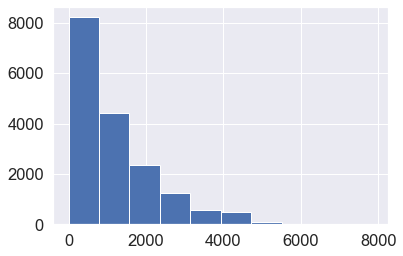

In [93]:
df['bike_number'].hist()

In [101]:
df.columns

Index(['index', 'timestamp', 'date', 'year', 'month', 'day', 'day_name',
       'week_number', 'time', 'bike_number', 'temperature',
       'temperature_feels', 'hum', 'wind_speed', 'weather_code',
       'weather_code_n', 'is_holiday', 'is_weekend', 'season', 'time_hour',
       'time_hour_number'],
      dtype='object')

<AxesSubplot:xlabel='bike_number', ylabel='temperature'>

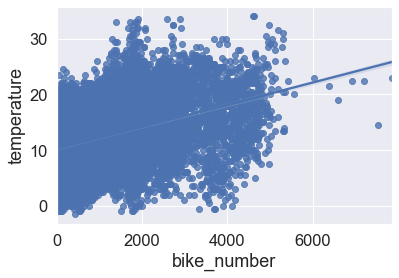

In [103]:
sns.regplot(data=df, y='temperature' , x='bike_number')

<AxesSubplot:xlabel='time_hour_number', ylabel='bike_number'>

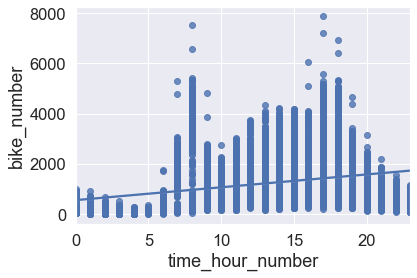

In [115]:
sns.regplot(data=df, x='time_hour_number' , y='bike_number')

In [121]:
df['month_no_categorical'] = df['month'].cat.as_ordered()

In [ ]:
sns.regplot(data=df, x='month' , y='bike_number')

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

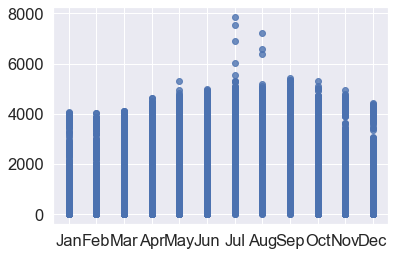

In [122]:
sns.regplot(data=df, x='month_no_categorical' , y='bike_number')

In [182]:
queue = (([2, 5, 3, 6, 4], 0), 6)

In [ ]:
print

In [ ]:
def queue(queuers,pos):
    